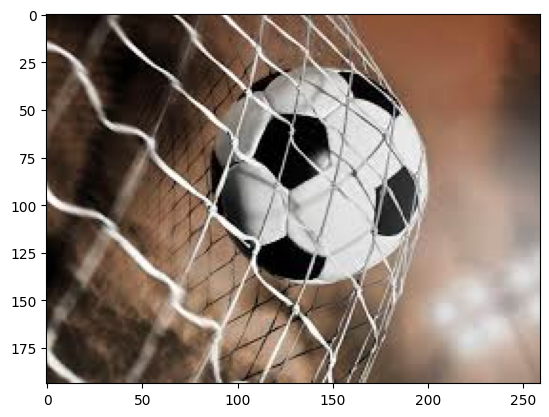

In [1]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("Untitled.jpeg")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img =cv2.resize(img_rgb,(1300,275))
plt.imshow(image)

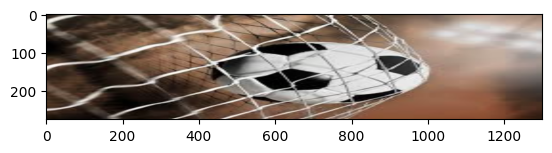

In [2]:
#ROTATION/FLIPPING

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Along central x axis
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

# Along central y axis
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

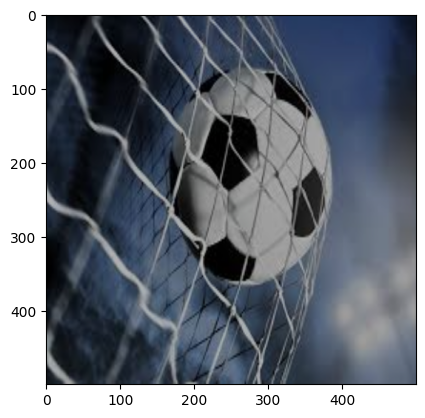

In [3]:
#Blending Images

import cv2
import matplotlib.pyplot as plt
# Two images
img1 = cv2.imread('Untitled.jpeg')
img2 = cv2.imread('dog.jpeg')
# Check image shape should be same
img1.shape
img2.shape
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
##Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000
img1 =cv2.resize(img1,(500,500))
img2 =cv2.resize(img2,(500,500))
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)
plt.imshow(blended)

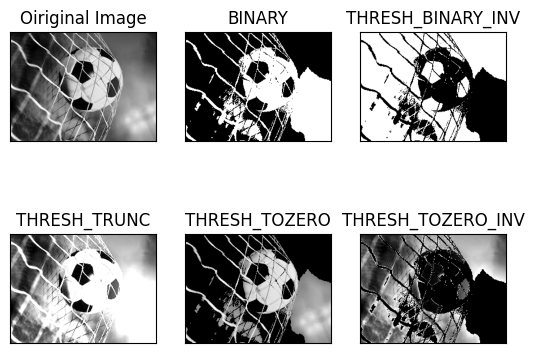

In [4]:
#Image Thresholding
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('Untitled.jpeg',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()


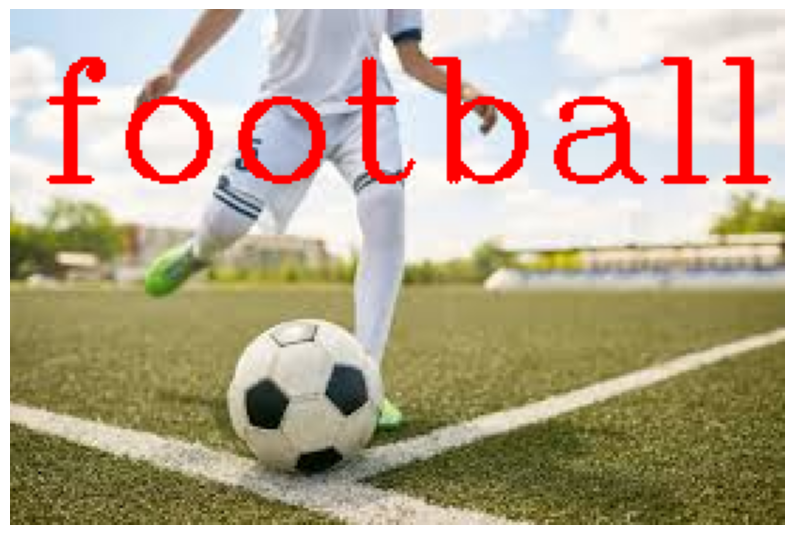

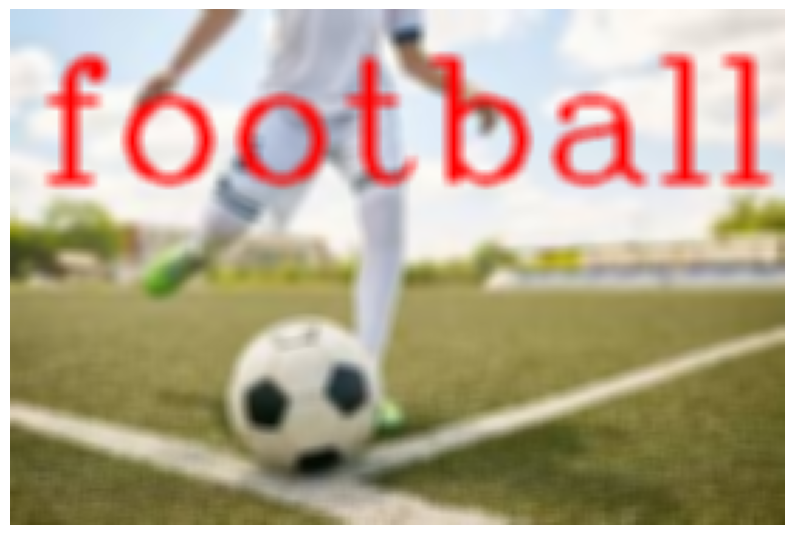

In [5]:
#Image Blurring and smoothing
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_img():
    img = cv2.imread('football.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_img(img):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img)
    plt.axis('off')  # Hide the axis for better visualization
    plt.show()

# Load the image
img = load_img()

# Add text before normalization
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='football', org=(10, 60), fontFace=font, fontScale=2, color=(255, 0, 0), thickness=2)

# Display the image with text
display_img(img)

# Convert the image to float32 and normalize to the range [0, 1]
img = img.astype(np.float32) / 255.0

# Apply average blurring
blurred_img = cv2.blur(img, ksize=(5, 5))

# Display the blurred image
display_img(blurred_img)

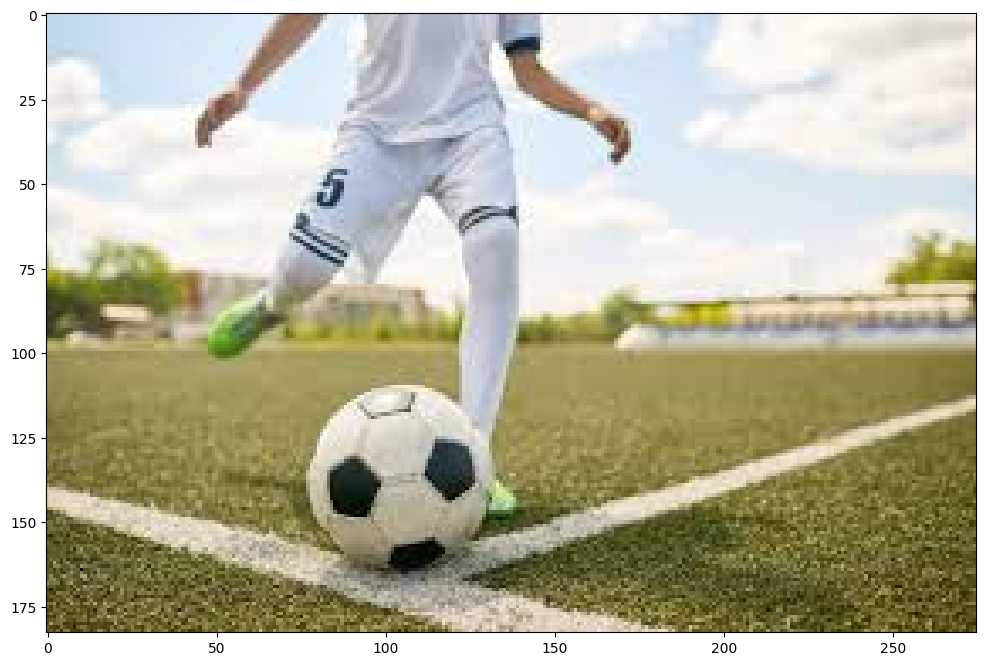

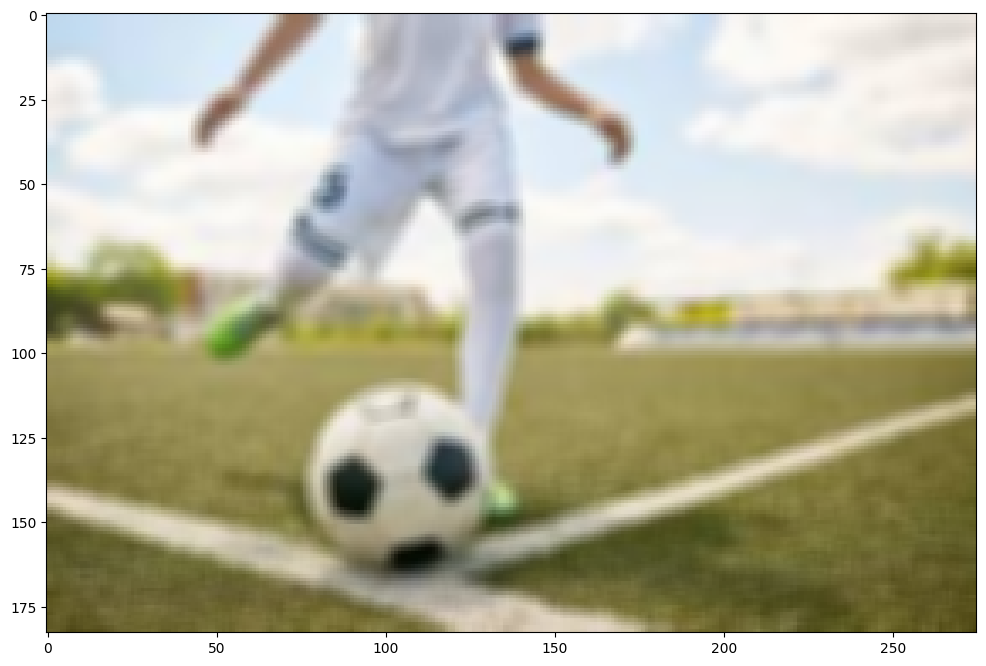

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def load_img():
    img = cv2.imread('football.jpeg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
  
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)
  
## Gaussian Blurring
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img,text='bricks',org=(10,600), fontFace=font,fontScale= 10,color=(255,0,0),thickness=4)
display_img(img)

blurred_img = cv2.GaussianBlur(img,(5,5),10)
display_img(blurred_img)

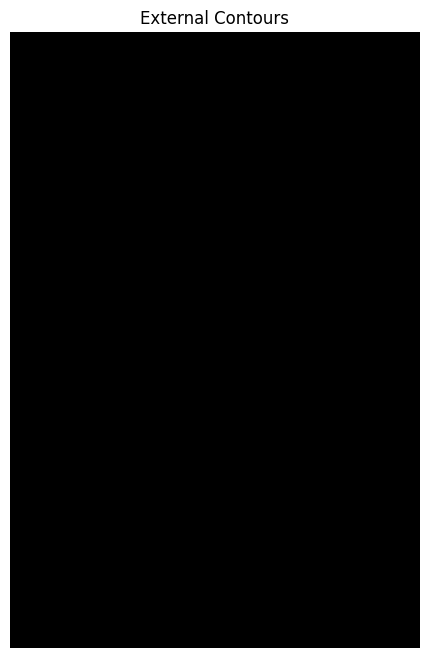

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_img():
    img = cv2.imread('hand.jpg', cv2.IMREAD_GRAYSCALE)
    return img

def display_img(img, title="Image"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image in grayscale
img = load_img()

# Threshold the image to binary
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours are found
if len(contours) == 0:
    print("No contours found!")
else:
    # Set up empty array to draw external contours
    external_contours = np.zeros_like(binary_img)

    # Draw external contours
    for i in range(len(contours)):
        # If it is an external contour
        if hierarchy[0][i][3] == -1:
            cv2.drawContours(external_contours, contours, i, 255, -1)

    # Display the external contours
    display_img(external_contours, title="External Contours")

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'objects.jpeg'
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    raise ValueError("Error: Image not loaded. Check the image path.")

# Get the height and width of the image
height, width = img.shape[:2]

# Split the image into four quadrants
quad1 = img[:height//2, :width//2]
quad2 = img[:height//2, width//2:]
quad3 = img[height//2:, :width//2]
quad4 = img[height//2:, width//2:]

# Display the quadrants
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(quad1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Quadrant 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(quad2, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Quadrant 2')
axs[0, 1].axis('off')

axs[1, 0].imshow(cv2.cvtColor(quad3, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Quadrant 3')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(quad4, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Quadrant 4')
axs[1, 1].axis('off')

plt.show()

ValueError: Error: Image not loaded. Check the image path.

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
denis_path = 'ppl face.jpg'
denis = cv2.imread(denis_path)

# Check if the image was loaded correctly
if denis is None:
    raise ValueError("Error: Image not loaded. Check the image path.")

# Load the face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face(img):
    # Copy the image
    face_img = img.copy()

    # Detect faces
    face_rects = face_cascade.detectMultiScale(face_img)

    # Draw rectangles around detected faces
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)

    return face_img

# Detect faces in the image
result = detect_face(denis)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

ValueError: Error: Image not loaded. Check the image path.

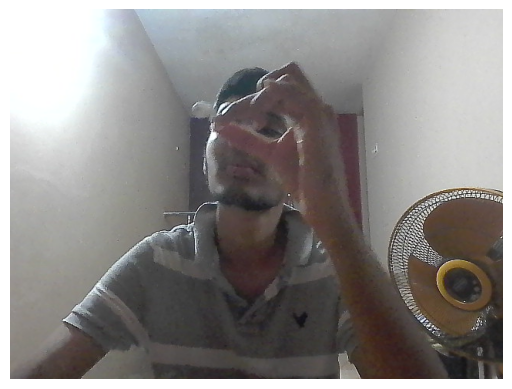

In [ ]:
#face detetction using webcam

import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Initialize the webcam
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Perform face detection (you can use any pre-trained face detection model)
    # For example, using Haar Cascade classifier:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame in the notebook
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    clear_output(wait=True)

    # Press 'q' to exit the loop
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

# Release the webcam
video_capture.release()


cv2.destroyAllWindows()